<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


## 1.

In [3]:
from sklearn.impute import SimpleImputer

numeric_features = list(df.dtypes[df.dtypes != "object"].index) #columnas numericas
numericas=df.loc[:,numeric_features] #sus datos
numericas.isnull().sum() # cuantos na hay?

year                    0
desplazamiento          2
cilindros               3
co2                     0
consumo_litros_milla    0
dtype: int64

In [4]:
imp_mean = SimpleImputer(strategy='mean') ##imputamos por promedio
numericas= imp_mean.fit_transform(numericas)

In [5]:
numericas

array([[1.98400000e+03, 2.50000000e+00, 4.00000000e+00, 5.22764706e+02,
        2.22671176e-01],
       [1.98400000e+03, 4.20000000e+00, 6.00000000e+00, 6.83615385e+02,
        2.91185385e-01],
       [1.98500000e+03, 2.50000000e+00, 4.00000000e+00, 5.55437500e+02,
        2.36588125e-01],
       ...,
       [2.01600000e+03, 9.00000000e-01, 3.00000000e+00, 2.55000000e+02,
        1.11335588e-01],
       [2.01700000e+03, 9.00000000e-01, 3.00000000e+00, 2.48000000e+02,
        1.08154571e-01],
       [2.01700000e+03, 9.00000000e-01, 3.00000000e+00, 2.57000000e+02,
        1.11335588e-01]])

In [6]:
from sklearn.preprocessing import MinMaxScaler #normalizamos
scaler = MinMaxScaler()
numericas= scaler.fit_transform(numericas)

In [7]:
numericas

array([[0.        , 0.24358974, 0.14285714, 0.39801393, 0.33102653],
       [0.        , 0.46153846, 0.28571429, 0.52767247, 0.47511312],
       [0.02941176, 0.24358974, 0.14285714, 0.42435082, 0.36029412],
       ...,
       [0.94117647, 0.03846154, 0.07142857, 0.18217411, 0.09688581],
       [0.97058824, 0.03846154, 0.07142857, 0.17653155, 0.09019608],
       [0.97058824, 0.03846154, 0.07142857, 0.18378627, 0.09688581]])

In [8]:
numericas= pd.DataFrame(data=numericas, columns= numeric_features)

In [9]:
numericas

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294
...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878
36787,0.941176,0.038462,0.071429,0.174919,0.090196
36788,0.941176,0.038462,0.071429,0.182174,0.096886
36789,0.970588,0.038462,0.071429,0.176532,0.090196


## 2.

In [10]:
categorica_features = list(df.dtypes[df.dtypes == "object"].index) #columnas categoricas
categoricas=df.loc[:,categorica_features] #sus datos

In [11]:
categoricas

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
1,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
2,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
3,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
4,Coches Medianos,dos,Automatica,Premium,grande,alto,alto
...,...,...,...,...,...,...,...
36786,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo
36787,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo
36788,Coches pequeños,dos,Manual,Premium,muy pequeño,muy bajo,muy bajo
36789,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo


In [12]:
ejemplo = pd.DataFrame({'A':['x','y','z'],'C': [1, 2, 3]})
pd.get_dummies(ejemplo)

,C,A_x,A_y,A_z
0,1,1,0,0
1,2,0,1,0
2,3,0,0,1


Acá vemos como get dummies lo que hace es que aquellos datos categoricos los codifica de forma binaria es decir crea una nueva columna por cada valor categorico de la colummna original con un vector que tiene 1 en aquella posición del valor y cero en el resto.

In [13]:
categoricas_codificado=pd.get_dummies(categoricas)

In [14]:
categoricas_codificado

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


## 3.

In [18]:
df_procesado= pd.concat([categoricas_codificado,numericas], axis=1, sort=False)

In [19]:
df_procesado

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0.000000,0.461538,0.285714,0.527672,0.475113
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0.029412,0.243590,0.142857,0.424351,0.360294
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0.029412,0.461538,0.285714,0.527672,0.475113
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0.088235,0.410256,0.285714,0.424351,0.360294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0.911765,0.051282,0.071429,0.173307,0.083878
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0.941176,0.038462,0.071429,0.174919,0.090196
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0.941176,0.038462,0.071429,0.182174,0.096886
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0.970588,0.038462,0.071429,0.176532,0.090196


## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

## 1.

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)
kmeans.fit(df_procesado)


KMeans()

## 2.

In [21]:
centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

In [25]:
clusters

array([0, 3, 0, ..., 5, 4, 5])

## 3.

In [26]:
df_procesado["cluster"] = clusters

In [27]:
df_procesado

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,year,desplazamiento,cilindros,co2,consumo_litros_milla,cluster
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0.000000,0.243590,0.142857,0.398014,0.331027,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0.000000,0.461538,0.285714,0.527672,0.475113,3
2,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0.029412,0.243590,0.142857,0.424351,0.360294,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0.029412,0.461538,0.285714,0.527672,0.475113,3
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0.088235,0.410256,0.285714,0.424351,0.360294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0.911765,0.051282,0.071429,0.173307,0.083878,4
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0.941176,0.038462,0.071429,0.174919,0.090196,4
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0.941176,0.038462,0.071429,0.182174,0.096886,5
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0.970588,0.038462,0.071429,0.176532,0.090196,4


In [106]:
for c in np.unique(clusters):
    d=df_procesado[df_procesado["cluster"]==c]
    l=d.loc[:,numeric_features].mean()
    if c==0:
        info_cluster_mean= pd.DataFrame(data=l).T
    else:
        info_cluster_mean.loc[c]= l.T

In [107]:
info_cluster_mean

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.476486,0.450899,0.327092,0.409930,0.343238
1,0.524300,0.250770,0.195525,0.304420,0.226575
2,0.588065,0.362121,0.299467,0.354068,0.282213
3,0.313071,0.548444,0.383841,0.507836,0.453114
4,0.695702,0.179404,0.150728,0.240178,0.156814
5,0.438404,0.159576,0.141184,0.242287,0.156504
6,0.409092,0.333846,0.258067,0.354202,0.281278
7,0.591198,0.624251,0.484308,0.504638,0.442795


In [124]:
for c in np.unique(clusters):
    d=df_procesado[df_procesado["cluster"]==c]
    l=d.loc[:,numeric_features].mode()
    if c==0:
        info_cluster_moda= l
    else:
        info_cluster_moda.loc[c]= l.values[0]

In [126]:
info_cluster_moda

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.029412,0.474359,0.285714,0.424351,0.331027
1,0.823529,0.179487,0.142857,0.317749,0.241830
2,0.617647,0.307692,0.285714,0.374603,0.281734
3,0.000000,0.564103,0.428571,0.454199,0.393464
4,0.970588,0.179487,0.142857,0.275108,0.194444
5,0.029412,0.179487,0.142857,0.275108,0.194444
6,0.000000,0.307692,0.285714,0.374603,0.305011
7,0.705882,0.717949,0.428571,0.488312,0.393464


## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [142]:
Nc=[5, 10, 20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado.drop(['cluster'],axis=1)).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,5,102310.085717
1,10,84305.932501
2,20,66703.683538
3,30,55529.485116
4,50,45530.641044


In [143]:
df_Elbow

,Number of Clusters,Score
0,5,102310.085717
1,10,84305.932501
2,20,66703.683538
3,30,55529.485116
4,50,45530.641044
5,75,36874.916531
6,100,30951.734062
7,200,17786.305001
8,300,11275.019355


<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Score'>

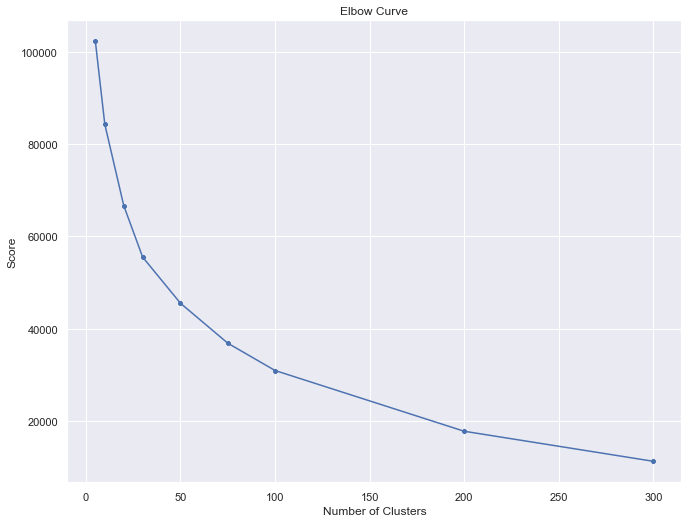

In [144]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

En base a la regla del codo, notamos que no existe ningun codo demasiado marcado pero por simplicidad por elegirse 200 cluster como óptimo ya que en en ese punte el score no cambia demasiado